# Leveraging Llama 3.2 90B Instruct model on Amazon Bedrock to analysis diabetes prevalence

Data source: https://ourworldindata.org/grapher/diabetes-prevalence

Tested by Haowen Huang 
18 Oct, 2024

In [1]:
import boto3
print('boto3 version')
print(boto3.__version__)

boto3 version
1.34.153


In [2]:
!pip install --upgrade boto3

In [3]:
MODEL_ID = "us.meta.llama3-2-90b-instruct-v1:0"

In [4]:
ORIGIN_IMAGE = "images/diabetes-prevalence.png"

In [5]:
from utils import disp_image
from utils import resize_image

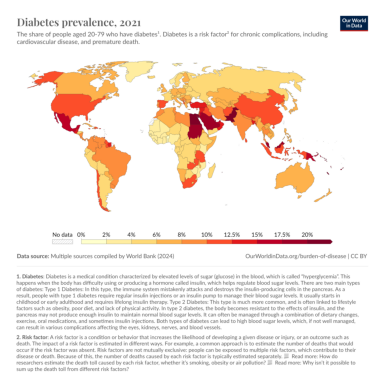

In [6]:
disp_image(ORIGIN_IMAGE)

In [7]:
from PIL import Image

In [8]:
img1 = Image.open(ORIGIN_IMAGE)

In [9]:
img1.size

(3400, 3451)

In [10]:
# RESIZED_IMG = resize_image(ORIGIN_IMAGE)
RESIZED_IMG = resize_image(img1)

Original size: 3400 x 3451
New size: 1008 x 1024


In [11]:
from PIL import Image

# Open the JPG image
jpg_image = Image.open("images/resized_image.jpg")

# Convert the image to PNG format
png_image = jpg_image.convert("RGB")

# Save the converted PNG image
png_image.save("images/resized_image.png")

In [12]:
RESIZED_IMAGE = "images/resized_image.png"

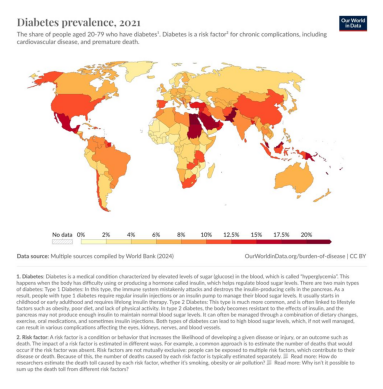

In [13]:
disp_image(RESIZED_IMAGE)

In [14]:
bedrock_runtime = boto3.client("bedrock-runtime")

In [15]:
with open(RESIZED_IMAGE, "rb") as f:
    image = f.read()

In [16]:
user_message = "According to this chart, which are the top 10 countries with the highest prevalence of diabetes?"

In [17]:
messages = [
    {
        "role": "user",
        "content": [
            {"image": {"format": "png", "source": {"bytes": image}}},
            {"text": user_message},
        ],
    }
]

In [18]:
response = bedrock_runtime.converse(
    modelId=MODEL_ID,
    messages=messages,
)

In [19]:
response_text = response["output"]["message"]["content"][0]["text"]

In [20]:
print(response_text)

According to the chart, the top 10 countries with the highest prevalence of diabetes are:

1.  **Saudi Arabia**: 17.5%
2.  **Egypt**: 17.5%
3.  **United Arab Emirates**: 17.5%
4.  **Bahrain**: 17.5%
5.  **Kuwait**: 17.5%
6.  **Qatar**: 17.5%
7.  **Oman**: 17.5%
8.  **Yemen**: 17.5%
9.  **Libya**: 17.5%
10. **Papua New Guinea**: 17.5%

These countries have the highest percentage of their population aged 20-79 with diabetes, according to the chart.


Then use the chart of asia to ask the Llama 3.2 model to dive deep.

In [21]:
ORIGIN_IMAGE = "images/diabetes-prevalence-asia.png"

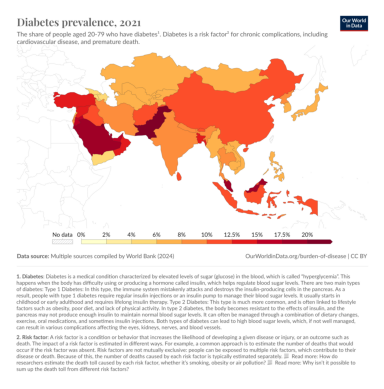

In [22]:
disp_image(ORIGIN_IMAGE)

In [23]:
from PIL import Image

img1 = Image.open(ORIGIN_IMAGE)
img1.size

(3400, 3451)

In [24]:
RESIZED_IMG = resize_image(img1)

Original size: 3400 x 3451
New size: 1008 x 1024


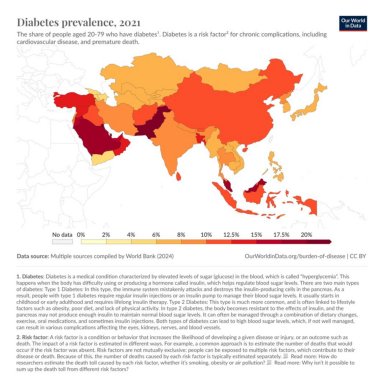

In [25]:
from PIL import Image

# Open the JPG image
jpg_image = Image.open("images/resized_image.jpg")

# Convert the image to PNG format
png_image = jpg_image.convert("RGB")

# Save the converted PNG image
png_image.save("images/resized_image.png")

RESIZED_IMAGE = "images/resized_image.png"

disp_image(RESIZED_IMAGE)

In [26]:
with open(RESIZED_IMAGE, "rb") as f:
    image = f.read()

In [27]:
user_message = "According to this chart, which are the top 10 countries with the highest prevalence of diabetes in Asia?"

In [28]:
messages = [
    {
        "role": "user",
        "content": [
            {"image": {"format": "png", "source": {"bytes": image}}},
            {"text": user_message},
        ],
    }
]

In [29]:
response = bedrock_runtime.converse(
    modelId=MODEL_ID,
    messages=messages,
)

In [30]:
response_text = response["output"]["message"]["content"][0]["text"]

In [31]:
print(response_text)

According to the chart, the top 10 countries with the highest prevalence of diabetes in Asia are:

1.  **Maldives** - 20%
2.  **Saudi Arabia** - 18.5%
3.  **Kuwait** - 17.5%
4.  **Bahrain** - 17.5%
5.  **Oman** - 17.5%
6.  **United Arab Emirates** - 17.5%
7.  **Qatar** - 17.5%
8.  **Iran** - 15%
9.  **Pakistan** - 15%
10. **Jordan** - 15%

These countries have the highest prevalence of diabetes in Asia, with the Maldives having the highest prevalence at 20%.
